In [44]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [46]:
data = pd.read_csv("C:\\Users\\aryan\\OneDrive\\Documents\\DATA SCIENCE\\ML SELF PRACTICE\\GITREPO\\FT-PROJECTS\\4. Titanic_Survival\\Python_Project_4_Log.csv")

In [47]:
data1 = data.copy(deep=True)
data2 = data.copy(deep=True)

In [48]:
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [49]:
data1.describe()*100

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,89100.000000,89100.000000,89100.000000,71400.000000,89100.000000,89100.000000,89100.000000
mean,44600.000000,38.383838,230.864198,2969.911765,52.300786,38.159371,3220.420797
std,25735.384202,48.659245,83.607124,1452.649733,110.274343,80.605722,4969.342860
min,100.000000,0.000000,100.000000,42.000000,0.000000,0.000000,0.000000
25%,22350.000000,0.000000,200.000000,2012.500000,0.000000,0.000000,791.040000
50%,44600.000000,0.000000,300.000000,2800.000000,0.000000,0.000000,1445.420000
75%,66850.000000,100.000000,300.000000,3800.000000,100.000000,0.000000,3100.000000
max,89100.000000,100.000000,300.000000,8000.000000,800.000000,600.000000,51232.920000


In [50]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
data1.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [52]:
data1.drop(['Cabin'],axis=1,inplace=True)

In [53]:
data1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [54]:
data1['Age'].fillna(data1['Age'].median(), inplace=True)

In [55]:
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [56]:
data1 = data1.dropna()

In [57]:
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Seperate Target and Feature where the Target is Survived

In [58]:
x = data1.drop(['Survived','Name','Ticket'],axis = 1)
y = data1.Survived

In [70]:
from sklearn.preprocessing import LabelEncoder
enc =LabelEncoder()

In [74]:
x['Sex'] = enc.fit_transform(x['Sex'])
x['Embarked'] = enc.fit_transform(x['Embarked'])

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [78]:
from sklearn.linear_model import LogisticRegression

In [80]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

g:\Anaconda\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:574: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
clf.score(x_test,y_test)

0.7921348314606742

In [83]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [85]:
y_pred = clf.predict(x_test)

In [86]:
accuracy_score(y_pred,y_test)

0.7921348314606742

In [87]:
confusion_matrix(y_pred,y_test)

array([[91, 20],
       [17, 50]], dtype=int64)

In [88]:
precision_score(y_pred,y_test)

0.7142857142857143

In [89]:
recall_score(y_pred,y_test)

0.746268656716418

In [90]:
f1_score(y_pred,y_test)

0.7299270072992701

In [91]:
y_prob = clf.predict_proba(x_test)

In [92]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

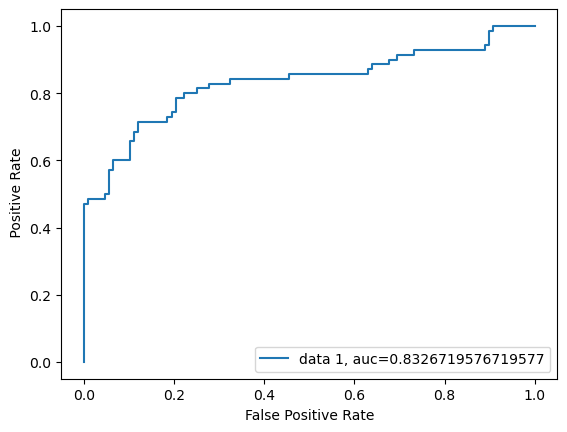

In [93]:
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()